In [6]:
import pandas as pd

df = pd.read_excel('data/Price Management.xlsx')

In [10]:
# df = df[df['Product Line Name'] == 'Surface top hammer drill rigs']

df_hammer_drill = df[df['Product Line Name'] == 'Surface top hammer drill rigs'].iloc[:-2]

X = df_hammer_drill[[
'Hole diameter min, mm',	
'Hole diameter max, mm',	
'Flushing air, m3/min',	
'Weight, kg',
'Drilling coverage, m2',
'Percussion power std, kW',
]]
y = df_hammer_drill['Average customer net price']

In [11]:
import numpy as np
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X, y)


In [18]:
import shap
shap.initjs()

explainer = shap.LinearExplainer(reg, X)
shap_values = explainer(X)
explanations = shap.Explanation(shap_values[:,:,], shap_values.base_values[:,], X, feature_names=X.columns)

In [22]:
shap.bar_plot(shap_values)

TypeError: bad operand type for abs(): 'Explanation'

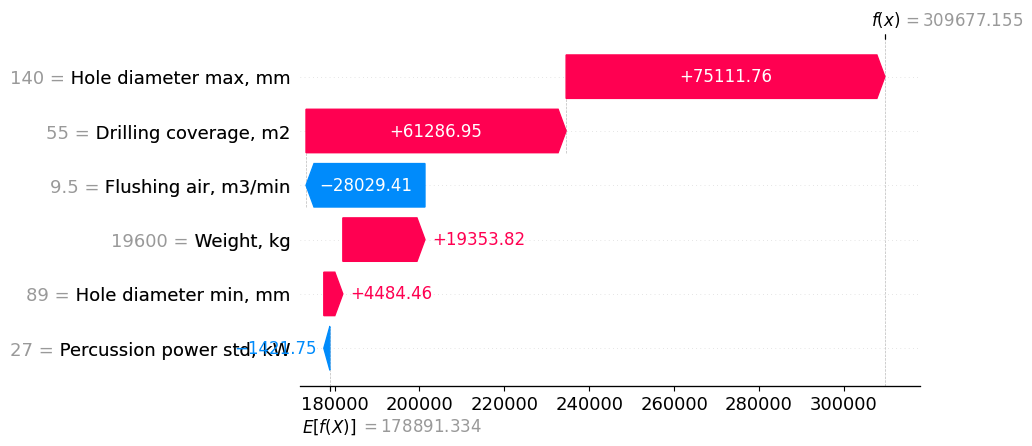

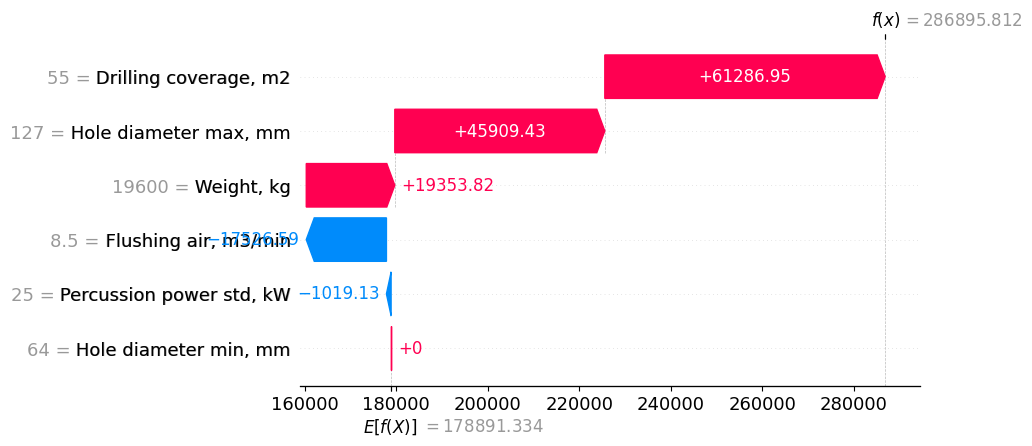

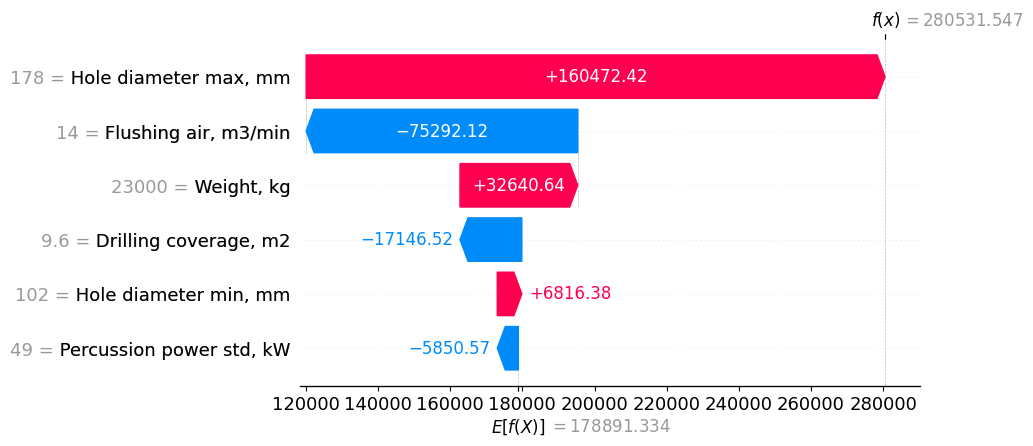

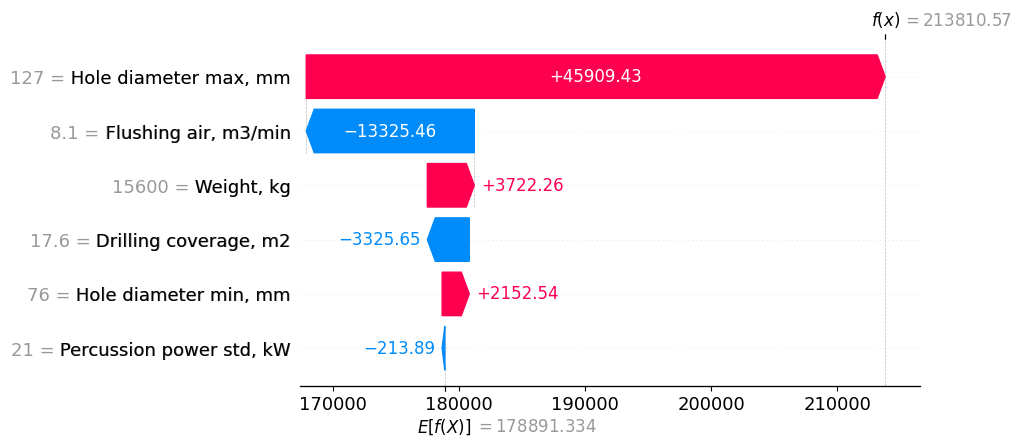

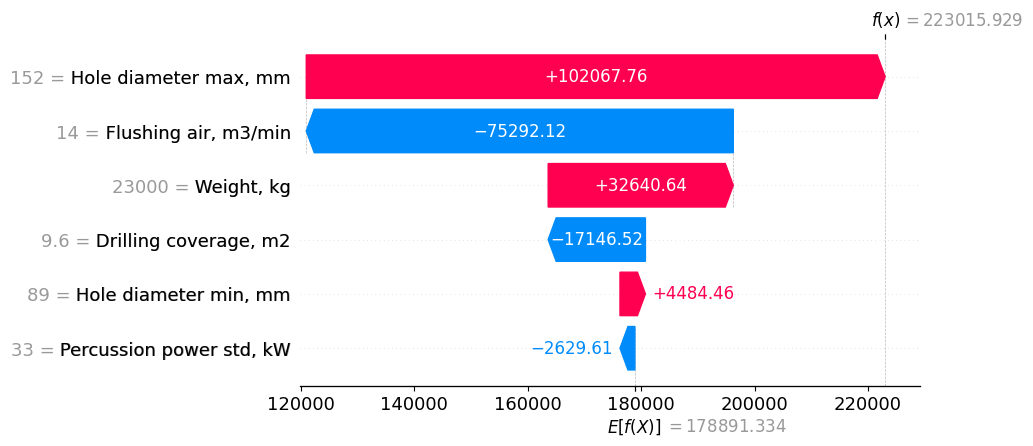

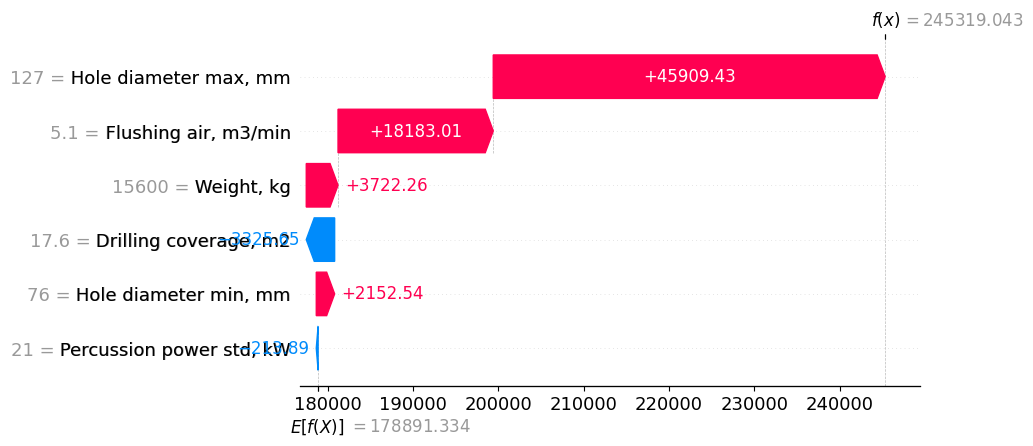

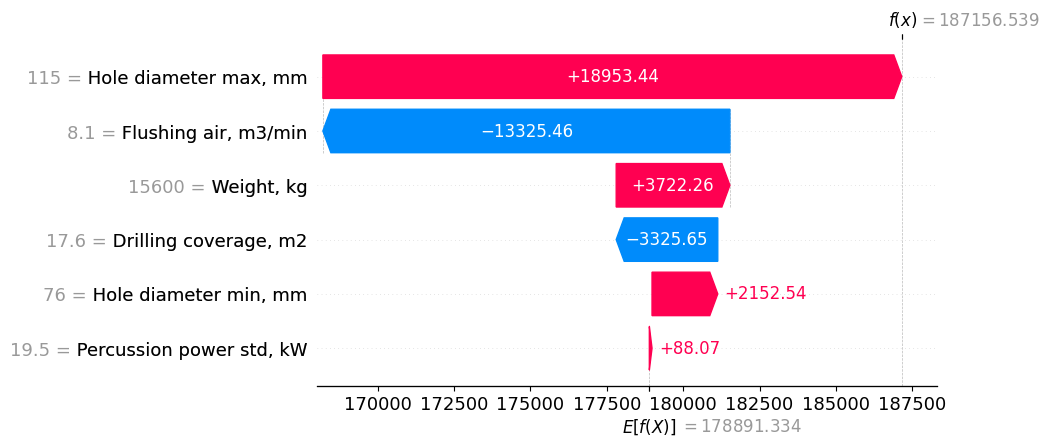

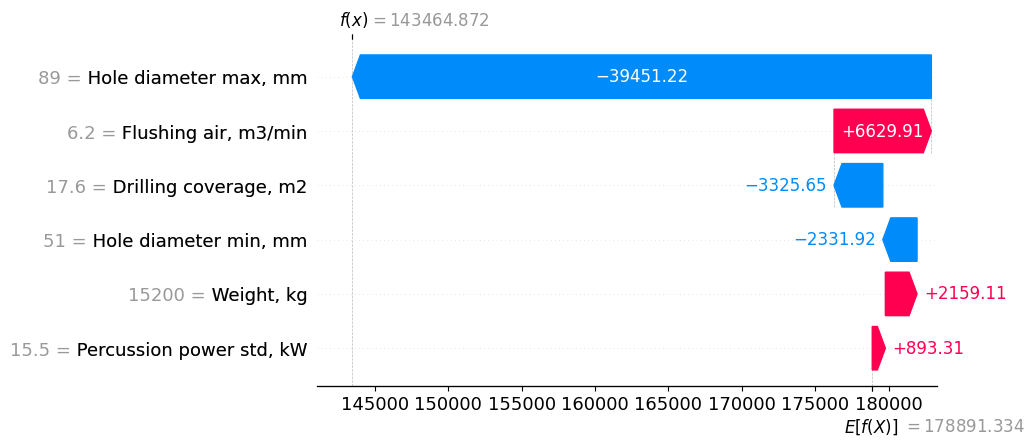

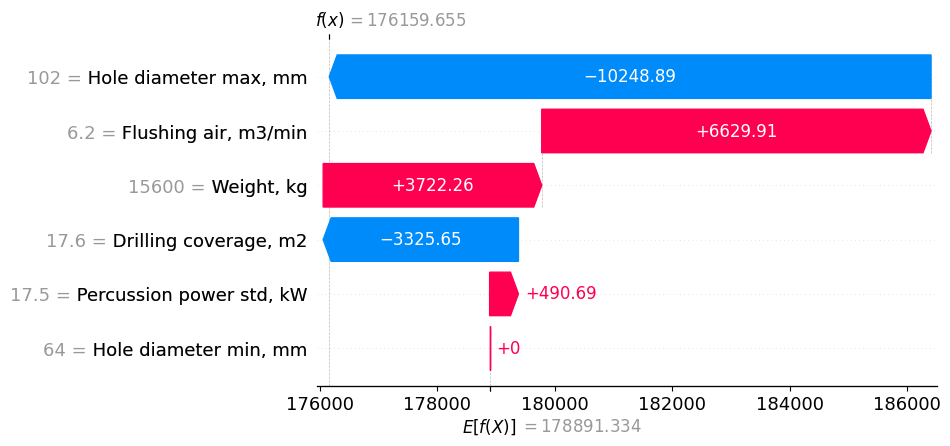

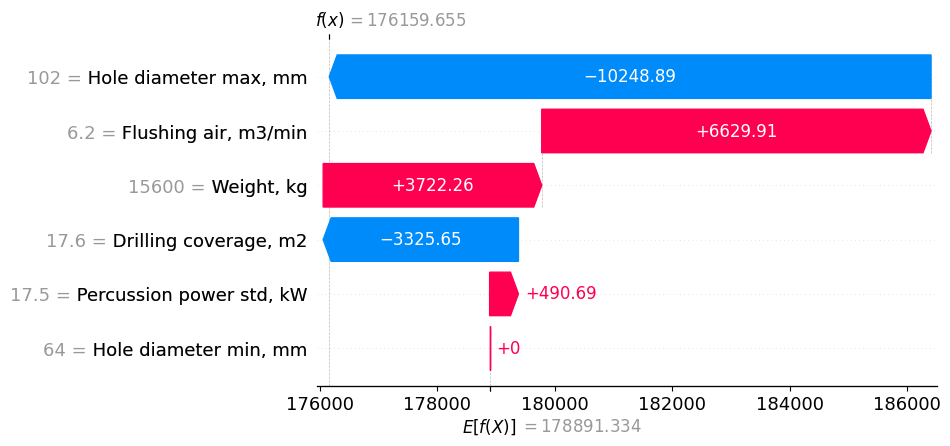

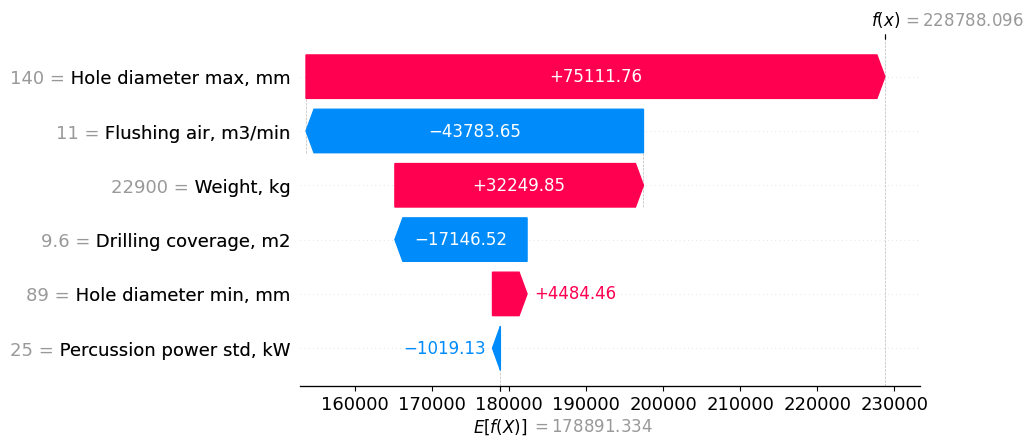

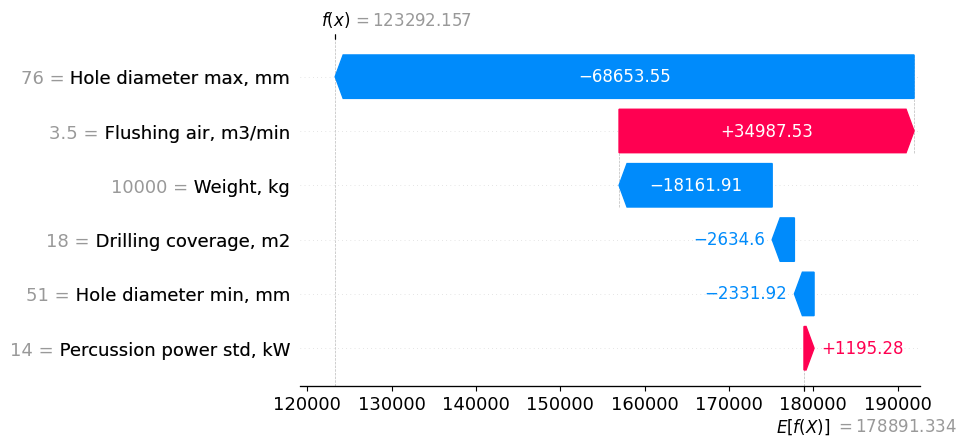

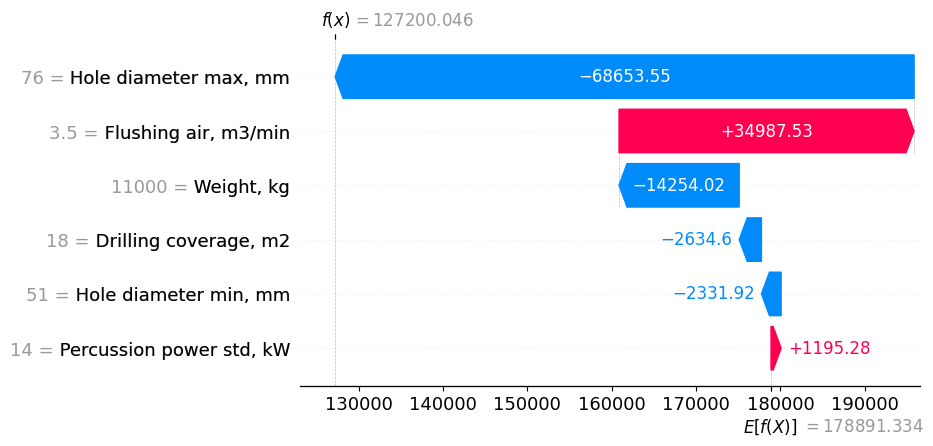

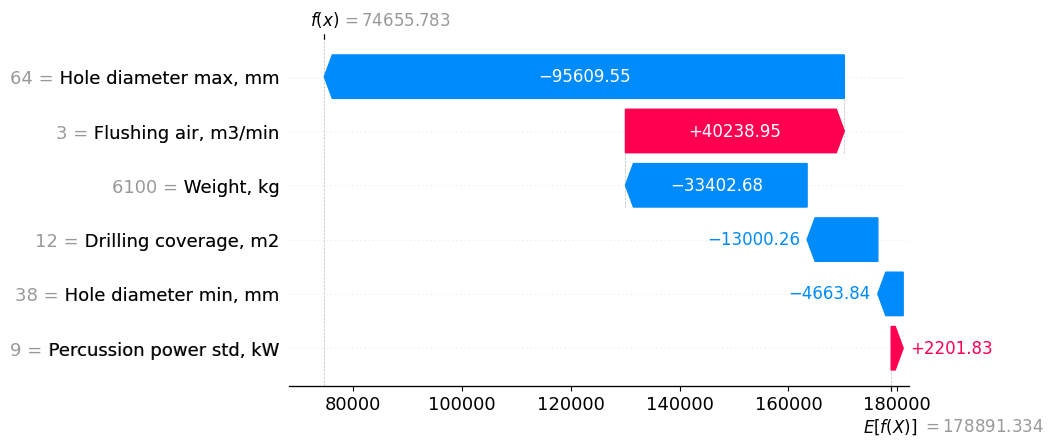

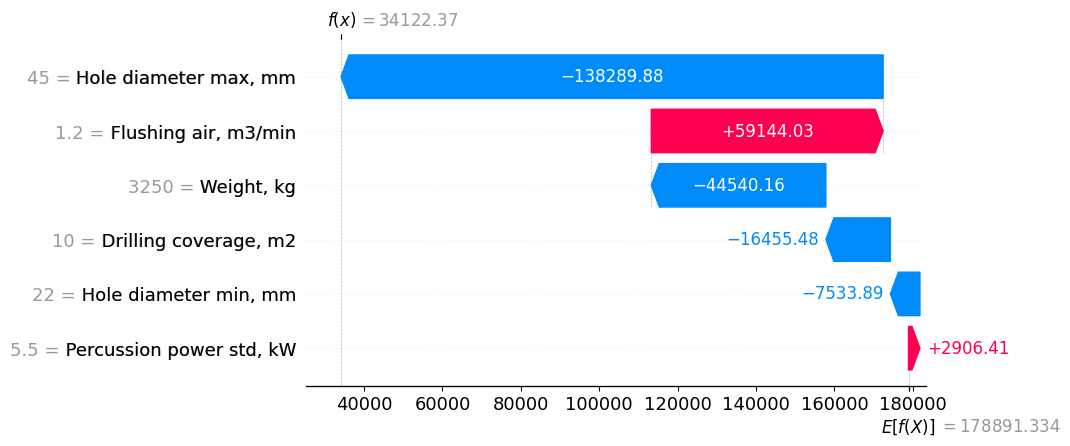

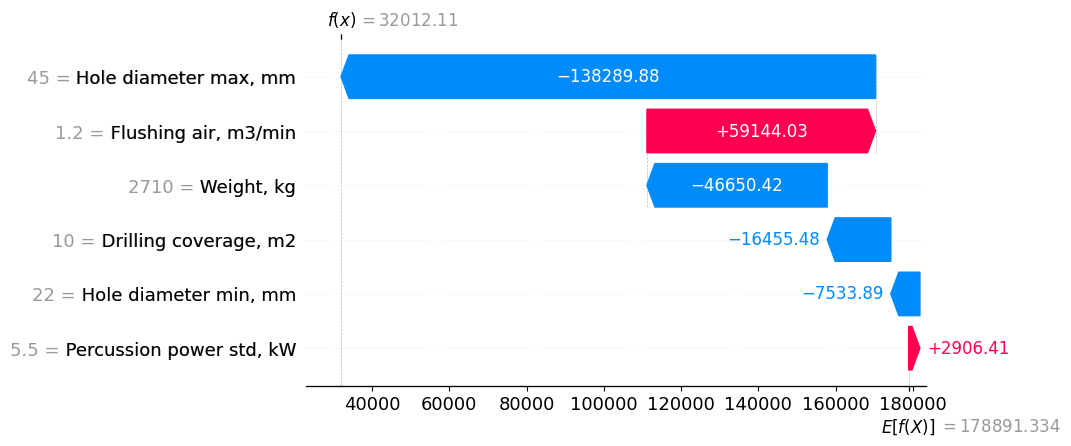

In [19]:
for exp in explanations:
    
    features_new, feature_names_new, values_new = list(), list(), list()
    for feature, feature_name, value in zip(exp.data, exp.feature_names, exp.values):
        if feature_name in ['cas_days_diff', 'eGFR', 'eGFR_next']: continue
        values_new.append(value)
        features_new.append(feature)
        feature_names_new.append(feature_name)
    exp.data = np.array(features_new)
    exp.values = np.array(values_new)
    exp.feature_names = feature_names_new

    shap.waterfall_plot(exp)

In [12]:
reg.score(X, y)

0.9297503500526726

In [13]:
reg.coef_

array([ 1.79378292e+02,  2.24633307e+03, -1.05028243e+04,  3.90788831e+00,
        1.72760956e+03, -2.01309988e+02])

In [14]:
reg.intercept_

-87175.07955200603